In [16]:
import pickle
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
X_train = pickle.load(open("X_train.pickle", "rb"))
Y_train = pickle.load(open("Y_train.pickle", "rb"))

X_val = pickle.load(open("X_val.pickle", "rb"))
Y_val = pickle.load(open("Y_val.pickle", "rb"))

X_test = pickle.load(open("X_test.pickle", "rb"))
Y_test = pickle.load(open("Y_test.pickle", "rb"))

In [3]:
base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=(128,128,3),
    pooling="max"
)

In [4]:
for layer in base_model.layers:
    layer.trainable = False

In [9]:
x = tf.keras.layers.Flatten()(base_model.output)
for _ in range(5):
    x = tf.keras.layers.Dense(1024, activation="relu")(x)
    x = tf.keras.layers.Dropout(0.5)(x)
predictions = tf.keras.layers.Dense(1, activation="sigmoid")(x)
 

In [10]:
head_model = tf.keras.Model(inputs=base_model.inputs, outputs=predictions)

In [11]:
head_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [12]:
history = head_model.fit(
    X_train,
    Y_train,
    batch_size=128,
    epochs=25,
    validation_data=(X_val, Y_val)
)

Epoch 1/25
13/13 [==============================] - 20s 1s/step - loss: 1.6240 - accuracy: 0.5931 - val_loss: 0.3517 - val_accuracy: 0.9450
Epoch 2/25
13/13 [==============================] - 15s 1s/step - loss: 0.3257 - accuracy: 0.8712 - val_loss: 0.1078 - val_accuracy: 0.9600
Epoch 3/25
13/13 [==============================] - 15s 1s/step - loss: 0.1655 - accuracy: 0.9344 - val_loss: 0.0941 - val_accuracy: 0.9650
Epoch 4/25
13/13 [==============================] - 15s 1s/step - loss: 0.1401 - accuracy: 0.9481 - val_loss: 0.0903 - val_accuracy: 0.9750
Epoch 5/25
13/13 [==============================] - 17s 1s/step - loss: 0.1240 - accuracy: 0.9481 - val_loss: 0.1065 - val_accuracy: 0.9600
Epoch 6/25
13/13 [==============================] - 16s 1s/step - loss: 0.0927 - accuracy: 0.9656 - val_loss: 0.0676 - val_accuracy: 0.9750
Epoch 7/25
13/13 [==============================] - 16s 1s/step - loss: 0.0933 - accuracy: 0.9644 - val_loss: 0.0556 - val_accuracy: 0.9900
Epoch 8/25
13/13 [==

In [18]:
head_model.metrics_names

['loss', 'accuracy']

In [19]:
head_model.evaluate(X_test, Y_test)

7/7 [==============================] - 2s 243ms/step - loss: 0.0277 - accuracy: 0.9900


[0.027692411094903946, 0.9900000095367432]

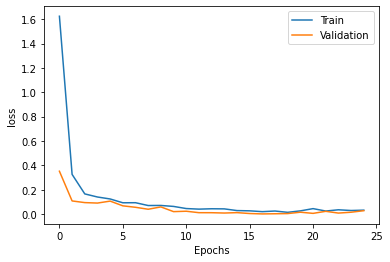

In [21]:
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Validation")

plt.xlabel("Epochs")
plt.ylabel("loss")

plt.legend()
plt.show()

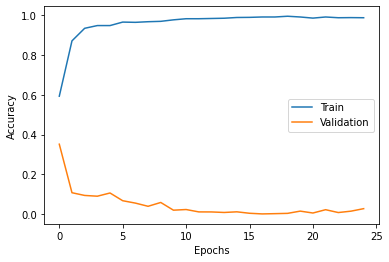

In [22]:
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_loss"], label="Validation")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

In [25]:
head_model.save("traning_model")

INFO:tensorflow:Assets written to: traning_model\assets


C:\Users\cagat\AppData\Roaming\Python\Python38\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
C:\Users\cagat\AppData\Roaming\Python\Python38\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)
